Finite element course MU4MES01 - S1

$\underline{\text{Students name}}$ : Duvivier Valentin & Richard Alexandre

$\underline{\text{Under the direction of}}$ : Maurini Corrado & Angela Vincenti
    
$\underline{\text{Last modified}}$ : 18/12/2020

$\underline{Abstract}$ : This report is part of the Td/Project of the Finite Element course. It's conducted in order to study numerically a 2D structure and derive the displacement field from it.

It has been done excluesively by Duvivier Valentin and Richard Alexandre, and so we engage ourselves by confirming that no part of the following have been plagiarized in anyway.

### Presentation of the problem

$\underline{Material}$

The system  is made of an isotropic homogeneous linear elastic material. Its elastic rigidity tensor is referred to as $\mathbb{A}$, while $\mathbb{S}$ stands for its elastic compliance tensor.

$\underline{Domain}$

The structure at stake in this problem is called $\Omega$. At last symmetries of the problem in terms of geometry, material properties and load allow to perform the study on only half of the part, namely of subpart located in the half space $x_1>0$.

<img src="ChgtMeca.png"  width="400" />

$\underline{Equations - Case ~ A}$

For better understanding, we advise to refer to written report for distinction case A and case B.

The part lays on a rigid horizontal stand. The part is supposed to remain in contact with the stand all along its lower plane surface located at $(x_2=0)$. It is moreover submitted to gravity as well as a pressure load on its upper boundary ($x_2=H$).
 
From the material subsection and this one, one sees that Hooke's law is to be applied. Moreover, we assume to be under HPP.

##### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 4.1 Numerical application - Elementary matrices

##### Matrix coordinates

In [2]:
#Data
L = 3. #Length
H = 1. #Height

coords = np.array([
                  [L,     H], 
                  [L,   H/2],
                  [L,     0],
                  [L/2,   H],
                  [L/2, H/2],
                  [L/2,   0],
                  [0,     H],
                  [0,   H/2],
                  [0,     0]
                           ])

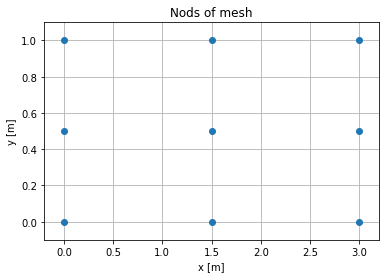

In [3]:
# Display

def plot_nodes(coords, L, H):
    plt.plot(coords[:,0], coords[:,1], "o")

    plt.title('Nods of mesh')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')

    plt.xlim(-0.2, L +.2)
    plt.ylim(-0.1, H +.1)

    plt.grid('True')
    
plot_nodes(coords, L, H)

##### Connectivity Matrix

In [4]:
# Connectivity matrix from figure

connect_mat = np.array([
                       [5, 2, 1],
                       [5, 3, 2],
                       [5, 6, 3],
                       [5, 9, 6],
                       [5, 8, 9],
                       [5, 7, 8],
                       [5, 4, 7],
                       [5, 1, 4]
                               ])

# Normalisation to python notation
connect_mat = connect_mat - 1 # as the first term in python is 0

# Display
connect_mat

array([[4, 1, 0],
       [4, 2, 1],
       [4, 5, 2],
       [4, 8, 5],
       [4, 7, 8],
       [4, 6, 7],
       [4, 3, 6],
       [4, 0, 3]])

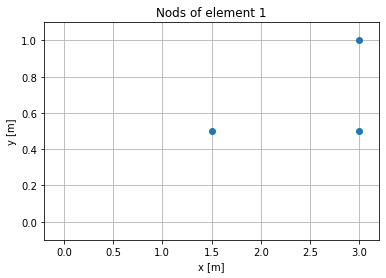

In [5]:
# Displaying one element

# element considered
k = 1

plt.figure()
plt.plot(coords[connect_mat[k-1]][:,0],  # k-1 to transform element into python (1==0)
         coords[connect_mat[k-1]][:,1], "o")

plt.title(f'Nods of element {k}')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.xlim(-0.2, L +.2)
plt.ylim(-0.1, H +.1)

plt.grid('True')

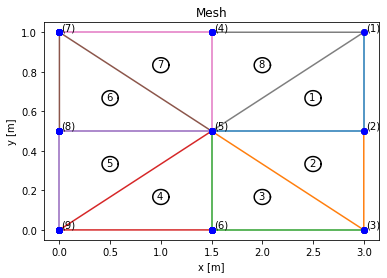

In [6]:
# Display the mesh + labels

def meshplot(coords, connect_mat):

    # circles for elements
    theta = np.linspace(0, 2*np.pi, 100)
    r = .08

    x = r*np.cos(theta)
    y = r*np.sin(theta)

    # ----------------------------------------------------------------------------

    # Display nods and the lines bounding them, and defining the mesh's shape
    for cell in connect_mat:
        plt.plot(coords[cell][:,0], coords[cell][:,1], "o-")

    # Annotate the nodes with corresponding number
    for i in range(np.size(coords, 0)):
        plt.plot(coords[i:,0],coords[i:,1],"bo")
        plt.annotate(str(f'({i+1})'), xy = (coords[i,0],coords[i,1]), xytext = (coords[i,0]+0.02, coords[i,1]+0.01))

    # Annotate the elements with corresponding number    
    for i in range(np.size(connect_mat, 0)):

        # Calculation center of the triangles
        centerX = sum(coords[connect_mat[i]][:,0])/3;
        centerY = sum(coords[connect_mat[i]][:,1])/3;

        # Display number of element at the center of each triangle
        plt.annotate(str(i+1), xy = (centerX, centerY), xytext = (centerX-0.04, centerY-0.01))        
        plt.plot(x+centerX, y*np.sqrt(2)/(L/H) +centerY, 'k')

    plt.title('Mesh')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
 
# Display mesh 
meshplot(coords, connect_mat)

##### Shape function $N_k(a)$

In [7]:
# Shape function

def N_k(a, i):
    N = np.array([a[0], a[1], 1-a[0]-a[1]])
    return N[i]

##### Jacobian matrix $1^{st}$ method

In [8]:
# Jacobian matrix

def J(i, coords, connect_mat):
    
    # Coordinates of i_th T3 element
    xs = coords[connect_mat[i]]
    
    J_matrix = np.array([
                        [xs[0,0] - xs[2,0], xs[1,0] - xs[2,0]],
                        [xs[0,1] - xs[2,1], xs[1,1] - xs[2,1]]
                                                             ])
    
    Jacobian = np.linalg.det(J_matrix)
    
    return (J_matrix, Jacobian)

In [9]:
# Display Jacobian of each element

for i in range(len(connect_mat)):
    
    (Ji, detJ) = J(i, coords, connect_mat)
    
    print(f"--------------------------------------------------------------\n")
    print(f"This is the Jacobian of element {i+1} for L = {L}, H = {H}")
    print(f"J =")
    print(Ji)
    print(f"\nThe surface of element {i+1} is {detJ/2} m²\n")

--------------------------------------------------------------

This is the Jacobian of element 1 for L = 3.0, H = 1.0
J =
[[-1.5  0. ]
 [-0.5 -0.5]]

The surface of element 1 is 0.375 m²

--------------------------------------------------------------

This is the Jacobian of element 2 for L = 3.0, H = 1.0
J =
[[-1.5  0. ]
 [ 0.  -0.5]]

The surface of element 2 is 0.375 m²

--------------------------------------------------------------

This is the Jacobian of element 3 for L = 3.0, H = 1.0
J =
[[-1.5 -1.5]
 [ 0.5  0. ]]

The surface of element 3 is 0.375 m²

--------------------------------------------------------------

This is the Jacobian of element 4 for L = 3.0, H = 1.0
J =
[[ 0.  -1.5]
 [ 0.5  0. ]]

The surface of element 4 is 0.375 m²

--------------------------------------------------------------

This is the Jacobian of element 5 for L = 3.0, H = 1.0
J =
[[1.5 0. ]
 [0.5 0.5]]

The surface of element 5 is 0.375 m²

-----------------------------------------------------------

In [10]:
# Surface total that has to be in agreement with H*L
print("From Jacobian, the total surface = {:.2f} m²".format(len(connect_mat)*np.linalg.det(Ji)/2))
print(f'And as expected with L = {L} m and H = {H} m we have S = {H*L:.2f} m²')

From Jacobian, the total surface = 3.00 m²
And as expected with L = 3.0 m and H = 1.0 m we have S = 3.00 m²


##### D_N matrix - Jacobian matrix $2^{nd}$ method

In [11]:
# D_N matrix of derivatives of shape function with respect to a

D_N = np.array([
               [1 ,  0],
               [0 ,  1],
               [-1, -1]
                      ])

# 2nd method of calculating the Jacobian matrix

for i in range(len(connect_mat)):
    
    Jii = np.dot(D_N.T, coords[connect_mat[i]]).T

    print(f"--------------------------------------------------------------")
    print(f"This is the Jacobian of the element {i+1} for L = {L}, H = {H}")
    print(f"J =")
    print(Jii)
    print(f"\nThe surface of element {i+1} is {np.linalg.det(Jii)/2} m²\n")

--------------------------------------------------------------
This is the Jacobian of the element 1 for L = 3.0, H = 1.0
J =
[[-1.5  0. ]
 [-0.5 -0.5]]

The surface of element 1 is 0.375 m²

--------------------------------------------------------------
This is the Jacobian of the element 2 for L = 3.0, H = 1.0
J =
[[-1.5  0. ]
 [ 0.  -0.5]]

The surface of element 2 is 0.375 m²

--------------------------------------------------------------
This is the Jacobian of the element 3 for L = 3.0, H = 1.0
J =
[[-1.5 -1.5]
 [ 0.5  0. ]]

The surface of element 3 is 0.375 m²

--------------------------------------------------------------
This is the Jacobian of the element 4 for L = 3.0, H = 1.0
J =
[[ 0.  -1.5]
 [ 0.5  0. ]]

The surface of element 4 is 0.375 m²

--------------------------------------------------------------
This is the Jacobian of the element 5 for L = 3.0, H = 1.0
J =
[[1.5 0. ]
 [0.5 0.5]]

The surface of element 5 is 0.375 m²

--------------------------------------------

##### Shape functions representtion

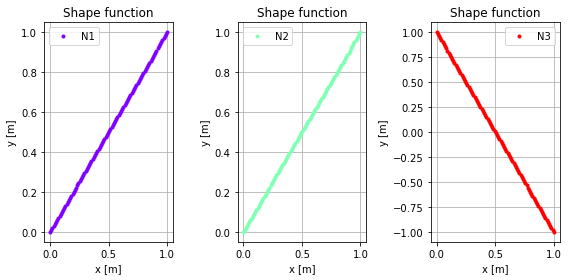

In [12]:
# N (shape function) for T3 element

from matplotlib.pyplot import cm

fig = plt.figure(figsize=(8,4))

N  = 100
a1 = np.linspace(0, 1, N)
a2 = np.linspace(0, 1, N)

# -----------------------------------------

n = 3
color = cm.rainbow(np.linspace(0,1,n))

for k, c in zip(range(3), color):
    ax = fig.add_subplot(1,3,k+1)

    ax.plot(a1, N_k([a1,a2], k), '.', c=c)

    plt.title('Shape function')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')

    plt.legend([f'N{k+1}'])
    plt.grid('True')

plt.tight_layout()

plt.savefig('Shape_function_T3.png')

### Alternate modeling - T6

In [13]:
# Coordinates

# Data
L = 3. #Length
H = 1. #Height

##### Coordinate matrix

In [14]:
# Coordinates matrix
coords_T6 = np.array([
                     [L,     H],
                     [L,   H/2],
                     [L,     0],
                     [L/2,   H],
                     [L/2, H/2],
                     [L/2,   0],
                     [0,     H],
                     [0,   H/2],
                     [0,     0]
                              ])

# Connectivity matrix
connect_mat_T6 = np.array([
                          [7, 9, 1, 8, 5, 4],
                          [9, 3, 1, 6, 2, 5],
                                           ])

# Python notation
connect_mat_T6 = connect_mat_T6-1

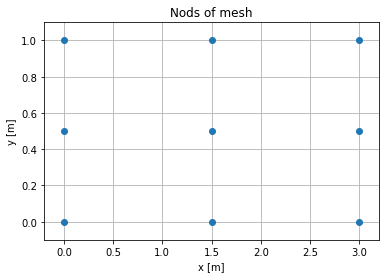

In [15]:
# Dispaly nodes
plot_nodes(coords_T6, L, H)

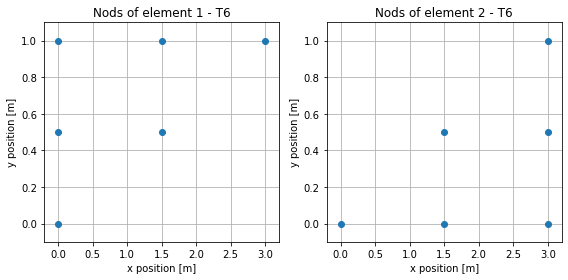

In [16]:
# Displaying both elements separately

fig = plt.figure(figsize=(8,4))

# ----------------------------------------------------

for k in range(np.size(connect_mat_T6, 0)):

    ax = fig.add_subplot(1,2,k+1)

    ax.plot(coords_T6[connect_mat_T6[k]][:,0], 
             coords_T6[connect_mat_T6[k]][:,1], "o")

    plt.title(f'Nods of element {k+1} - T6')
    plt.xlabel('x position [m]')
    plt.ylabel('y position [m]')

    plt.xlim(-0.2, L +.2)
    plt.ylim(-0.1, H +.1)

    plt.grid('True')

fig.tight_layout()

##### Shape functions

In [17]:
# Shape functions 

# Code line to eliminate numerical error (ex 10^-17 instead of 0)
np.set_printoptions(suppress=True)

# ---------------------------------------------------------------------------

# N = c1.a2² + c2.a1² + c3.a1.a2 + c4.a2 + c5.a1 + c6
# c1, c2, c3, c4, c5, c6 real constant (different for each N) values

# ---------------------------------------------------------------------------

# Calculation coeff N_k

def shape_function_T6(coords, v):

    # a_2**2
    M_1 = np.array([a**2 for a in coords[:,1]])
    # a_1**2
    M_2 = np.array([a**2 for a in coords[:,0]])
    # a_1*a_2
    M_3 = np.array([a for a in coords[:,0]*coords[:,1]])
    # a_2
    M_4 = np.array([a for a in coords[:,1]])
    # a_1
    M_5 = np.array([a for a in coords[:,0]])
    # 1
    ONE = np.linspace(1, 1, np.size(coords,0))
    
    # -----------------------------------------------

    # Transposes of the above vectors
    M_1 = M_1.reshape(-1, 1)
    M_2 = M_2.reshape(-1, 1)
    M_3 = M_3.reshape(-1, 1)
    M_4 = M_4.reshape(-1, 1)
    M_5 = M_5.reshape(-1, 1)
    ONE = ONE.reshape(-1, 1)

    # Concatenation
    M = np.append(M_1, M_2, axis=1)
    M = np.append(M, M_3, axis=1)
    M = np.append(M, M_4, axis=1)
    M = np.append(M, M_5, axis=1)
    M = np.append(M, ONE, axis=1)

    # -----------------------------------------------

    # Resolution system
    N = np.linalg.solve(M, v)

    print("\nN's coefficients are : \n")
    print(N)

    return N

# Vectors from nods cd° : N1 = 1 in (0,0) ...
# ex : N1 = v1[0]*a2² + v1[1]*a1² + v1[2]*a1a2 + v1[3]*a2 + v1[4]*a1 + v1[5]

v = np.eye(6)



In [18]:
# Unit T6

coords_norm = np.array([
                       [0,     0],
                       [1,     0],
                       [0,     1],                   
                       [1/2,   0],
                       [1/2, 1/2],
                       [0,   1/2]                   
                                ])

N = shape_function_T6(coords_norm, v)
print('  (1) (2) (3) (4) (5) (6)')


N's coefficients are : 

[[ 2.  0.  2.  0.  0. -4.]
 [ 2.  2.  0. -4.  0.  0.]
 [ 4.  0.  0. -4.  4. -4.]
 [-3.  0. -1. -0. -0.  4.]
 [-3. -1.  0.  4.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]]
  (1) (2) (3) (4) (5) (6)


Each column corresponds to the associated N :
for instance (1) $\rightarrow$ N1, (4) $\rightarrow$ N4, etc.

In [19]:
# Interpolation matrix for both elements

print('Interpolation matrix of element 1 :')
N1 = shape_function_T6(coords_T6[connect_mat_T6[0]], v)
print('  (7)         (9)         (1)         (8)         (5)         (4)')

print('\n# -------------------------------------------------------------- #\n')

print('Interpolation matrix of element 2')
N2 = shape_function_T6(coords_T6[connect_mat_T6[1]], v)
print('  (9)         (3)         (1)         (6)         (2)         (5)')

Interpolation matrix of element 1 :

N's coefficients are : 

[[ 2.          2.          0.         -4.          0.          0.        ]
 [ 0.22222222  0.          0.22222222  0.         -0.         -0.44444444]
 [-1.33333333  0.         -0.          1.33333333 -1.33333333  1.33333333]
 [-1.         -3.          0.          4.         -0.         -0.        ]
 [ 0.33333333  0.         -0.33333333 -1.33333333  1.33333333  0.        ]
 [ 0.          1.          0.          0.          0.          0.        ]]
  (7)         (9)         (1)         (8)         (5)         (4)

# -------------------------------------------------------------- #

Interpolation matrix of element 2

N's coefficients are : 

[[ 0.          2.          2.         -0.         -4.         -0.        ]
 [ 0.22222222  0.22222222  0.         -0.44444444  0.          0.        ]
 [ 0.         -1.33333333  0.          1.33333333  1.33333333 -1.33333333]
 [ 0.          1.         -1.         -4.         -0.          4.  

##### Representation T6

In [20]:
# Shape function
def N_k_T6(a1, a2, N, i):
    N_k = N[0,i]*a2**2 + N[1,i]*a1**2 + N[2,i]*a1*a2 + N[3,i]*a2 + N[4,i]*a1 + N[5,i]
    return N_k

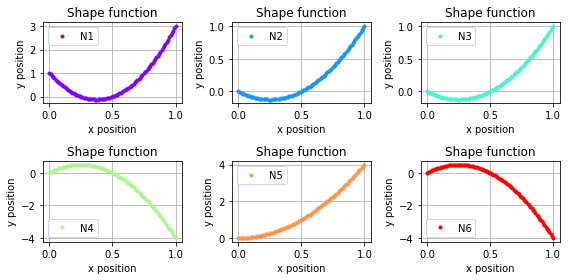

In [21]:
from matplotlib.pyplot import cm

fig = plt.figure(figsize=(8,4))

Nx  = 100
a1 = np.linspace(0, 1, Nx)
a2 = np.linspace(0, 1, Nx)

# -----------------------------------------

n = 6
color = cm.rainbow(np.linspace(0,1,n))

for k, c in zip(range(1,6+1),color):
    ax = fig.add_subplot(2,3,k)
    ax.plot(a1, N_k_T6(a1, a2, N, k-1), '.', c=c)

    plt.title('Shape function')
    plt.xlabel('x position')
    plt.ylabel('y position')

    plt.legend(['N{}'.format(k)])
    plt.grid('True')

fig.tight_layout()

plt.savefig('Shape_function_T6.png')

##### 3D representation shape functions

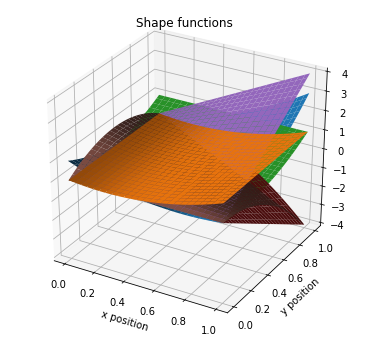

In [22]:
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# -----------------------------------------

Nx  = 100
a1 = np.linspace(0, 1, Nx)
a2 = np.linspace(0, 1, Nx)
a2 = a2.reshape(-1,1)

for i in range(len(N)):
    ax.plot_surface(a1, a2, N_k_T6(a1, a2, N, i), rstride=4, cstride=4, linewidth=0)    

plt.title('Shape functions')
plt.xlabel('x position')
plt.ylabel('y position')

plt.show()

##### Example with $N_4$

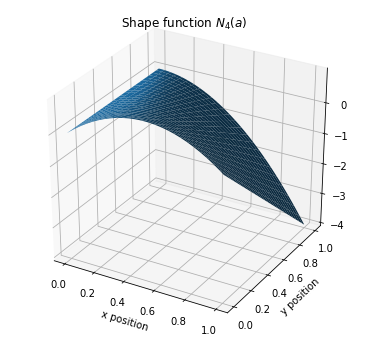

In [23]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# -----------------------------------------

Nx  = 100
a1 = np.linspace(0, 1, Nx)
a2 = np.linspace(0, 1, Nx)
a2 = a2.reshape(-1,1)

ax.plot_surface(a1, a2, N_k_T6(a1, a2, N, 3), rstride=4, cstride=4, linewidth=0)    

plt.title(r'Shape function $N_4(a)$')
plt.xlabel('x position')
plt.ylabel('y position')

plt.show()

##### Jacobian matrix

In [24]:
# Jacobian matrix

# Redefying these variables
a1 = int()
a2 = int()

def JT6(i, coords, connect_mat):

    # Coordinates of i_th T3 element
    xs = coords[connect_mat[i]]
                
    # Jacobian of this i_th T6 element now that we have its coordinates (the one of its three nods) 
    
    J11_a1 = xs[0,0]+xs[1,0]-2*xs[3,0]; J11_a2 = xs[0,0]-xs[3,0]+xs[4,0]-xs[5,0]; J11_c = -3*xs[0,0] - xs[1,0] + 4*xs[3,0];
    J21_a1 = xs[0,1]+xs[1,1]-2*xs[3,1]; J21_a2 = xs[0,1]-xs[3,1]+xs[4,1]-xs[5,1]; J21_c = -3*xs[0,1] - xs[1,1] + 4*xs[3,1];
    
    J12_a1 = xs[0,0]-xs[3,0]+xs[4,0]-xs[5,0]; J12_a2 = xs[0,0]+xs[2,0]-2*xs[5,0]; J12_c = -3*xs[0,0] - xs[2,0] + 4*xs[5,0];
    J22_a1 = xs[0,1]-xs[3,1]+xs[4,1]-xs[5,1]; J22_a2 = xs[0,1]+xs[2,1]-2*xs[5,1]; J22_c = -3*xs[0,1] - xs[2,1] + 4*xs[5,1];

    J = np.array([
                 [4*a1*(J11_a1) + 4*a2*(J11_a2) + J11_c, 4*a1*(J12_a1) + 4*a2*(J12_a2) + J12_c], 
                 [4*a1*(J21_a1) + 4*a2*(J21_a2) + J21_c, 4*a1*(J22_a1) + 4*a2*(J22_a2) + J22_c]
                                                                                              ])
    detJ = np.linalg.det(J)
    
    return (J, detJ)

In [25]:
nb_elem = np.size(connect_mat_T6, 0)

# Surface of the mesh from Jaconian calculation
surf = 0

for e in range(nb_elem):
    (J6, detJ) = JT6(e, coords_T6, connect_mat_T6)
    surf += detJ/2
    
    print(f"--------------------------------------------------------------\n")
    print(f"This is the Jacobian of the element {e+1} for L = {L}, H = {H}")
    print(f"J =")
    print(J6)
    print(f"\nThe surface of element {e+1} is {detJ/2:.2f} m²\n")

--------------------------------------------------------------

This is the Jacobian of the element 1 for L = 3.0, H = 1.0
J =
[[ 0.  3.]
 [-1.  0.]]

The surface of element 1 is 1.50 m²

--------------------------------------------------------------

This is the Jacobian of the element 2 for L = 3.0, H = 1.0
J =
[[3. 3.]
 [0. 1.]]

The surface of element 2 is 1.50 m²



In [26]:
# Surface total that has to be in agreement with H*L
print("From Jacobian, the total surface = {:.2f} m²".format(surf))
print(f'And as expected with L = {L} m and H = {H} m we have S = {H*L:.2f} m²')

From Jacobian, the total surface = 3.00 m²
And as expected with L = 3.0 m and H = 1.0 m we have S = 3.00 m²


### 5.1 - Numerical application - Strains

In [27]:
# RECALL

# Data
L = 3. #Length
H = 1. #Height

coords = np.array([
                  [L,     H], 
                  [L,   H/2],
                  [L,     0],
                  [L/2,   H],
                  [L/2, H/2],
                  [L/2,   0],
                  [0,     H],
                  [0,   H/2],
                  [0,     0]
                           ])

# ------------------------------------------------------------

# Connectivity matrix from figure

connect_mat = np.array([
                       [5, 2, 1],
                       [5, 3, 2],
                       [5, 6, 3],
                       [5, 9, 6],
                       [5, 8, 9],
                       [5, 7, 8],
                       [5, 4, 7],
                       [5, 1, 4]
                               ])

# Normalisation to python notation
connect_mat = connect_mat - 1

### Strains

##### $G_N$ Matrix

In [28]:
# Code line to eliminate numerical error (ex 10^-17 instead of 0)
np.set_printoptions(suppress=True)

# ----------------------------------------------------------
# ----------------------------------------------------------

# Gn matrix

def Gn(D_N, Ji):
    
    """ Fuction returning the product Dn.(J^-1) also known as Gn """
    
    J_inv = np.linalg.inv(Ji)
    G_N   = np.dot(D_N, J_inv)
                        
    return G_N

In [29]:
for i in range(len(connect_mat)):
    
    (Ji, detJ) = J(i, coords, connect_mat)
    G_N = Gn(D_N, Ji)
    
    print(f"This is the matrix Gn of the element {i+1} for L = {L}, H = {H}")
    print(G_N)
    print('\n')

This is the matrix Gn of the element 1 for L = 3.0, H = 1.0
[[-0.66666667  0.        ]
 [ 0.66666667 -2.        ]
 [ 0.          2.        ]]


This is the matrix Gn of the element 2 for L = 3.0, H = 1.0
[[-0.66666667  0.        ]
 [ 0.         -2.        ]
 [ 0.66666667  2.        ]]


This is the matrix Gn of the element 3 for L = 3.0, H = 1.0
[[-0.          2.        ]
 [-0.66666667 -2.        ]
 [ 0.66666667  0.        ]]


This is the matrix Gn of the element 4 for L = 3.0, H = 1.0
[[ 0.          2.        ]
 [-0.66666667  0.        ]
 [ 0.66666667 -2.        ]]


This is the matrix Gn of the element 5 for L = 3.0, H = 1.0
[[ 0.66666667  0.        ]
 [-0.66666667  2.        ]
 [ 0.         -2.        ]]


This is the matrix Gn of the element 6 for L = 3.0, H = 1.0
[[ 0.66666667  0.        ]
 [ 0.          2.        ]
 [-0.66666667 -2.        ]]


This is the matrix Gn of the element 7 for L = 3.0, H = 1.0
[[ 0.         -2.        ]
 [ 0.66666667  2.        ]
 [-0.66666667  0.     

In [30]:
def Be_a(i, coords, connect_mat):
    
    """ Fuction returning a sort of reshape of function Gn result, 
     in order to fit the vectorial notation of deformation tensor. """
    
    (Ji, detJ)  = J(i, coords, connect_mat)

    G_N = Gn(D_N, Ji)
    G_N = G_N.T

    Be = np.zeros((3, 6))
    
    for i in range(3):
        Be[0][i*2]   = G_N[0][i]
        Be[1][i*2+1] = G_N[1][i]
        Be[2][i*2]   = G_N[1][i]
        Be[2][i*2+1] = G_N[0][i]
  
    return Be

""" In detail for T3

    return ([
            [G_N[0,0],        0, G_N[0,1],        0, G_N[0,2],        0],
            [       0, G_N[1,0],        0, G_N[1,1],        0, G_N[1,2]],
            [G_N[1,0], G_N[0,0], G_N[1,1], G_N[0,1], G_N[1,2], G_N[0,2]]
                                                                       ])
"""

' In detail for T3\n\n    return ([\n            [G_N[0,0],        0, G_N[0,1],        0, G_N[0,2],        0],\n            [       0, G_N[1,0],        0, G_N[1,1],        0, G_N[1,2]],\n            [G_N[1,0], G_N[0,0], G_N[1,1], G_N[0,1], G_N[1,2], G_N[0,2]]\n                                                                       ])\n'

In [31]:
# Display result

# Be matrix to get the deformation vector from T3 normalized (all derives from our N = N1,N2,N3)

print('Be_1(x) is as follows : ')
print(Be_a(0, coords, connect_mat))

print('\n# ------------------------------------------------------------------------ #\n')

print('Be_2(x) is as follows : ')
print(Be_a(1, coords, connect_mat))

print('\n# ------------------------------------------------------------------------ #\n')

print(f"Be_3(x) is as follows : ")
print(Be_a(2, coords, connect_mat))

Be_1(x) is as follows : 
[[-0.66666667  0.          0.66666667  0.          0.          0.        ]
 [ 0.          0.          0.         -2.          0.          2.        ]
 [ 0.         -0.66666667 -2.          0.66666667  2.          0.        ]]

# ------------------------------------------------------------------------ #

Be_2(x) is as follows : 
[[-0.66666667  0.          0.          0.          0.66666667  0.        ]
 [ 0.          0.          0.         -2.          0.          2.        ]
 [ 0.         -0.66666667 -2.          0.          2.          0.66666667]]

# ------------------------------------------------------------------------ #

Be_3(x) is as follows : 
[[-0.          0.         -0.66666667  0.          0.66666667  0.        ]
 [ 0.          2.          0.         -2.          0.          0.        ]
 [ 2.         -0.         -2.         -0.66666667  0.          0.66666667]]


These useful tools are to be exploited afterward to build the system KU = F with K built in part from Be.

Besides, they will give us information on the sizes of global matrices and vectors.

### Assembly

##### Rigidity tensor under matricial form - $\mathbb{A}$

In [32]:
# Data to define A from K = T.Be*A*Be

# -----------------------------------------------------

# Young modulus - low enough to see displacement
E   = 100  # much lower than real value : e.g. steel for building - E = 210 * 10^9

# Shearing coefficient
nu  = .49

# -----------------------------------------------------

# lambda
lam = 2*nu*E/((1+nu)*(1-2*nu))

# mu
mu  = E/(1+nu)

# -----------------------------------------------------

# Components obtained from : {epsilon} = [A]{sigma}
A = np.array([
             [lam+2*mu,      lam,  0],
             [     lam, lam+2*mu,  0],
             [       0,        0, mu]
                                    ])

#### Dimensions

The dimension of $Ke(a)$ is obtained from the one of $Be(a)$ as :
$$K = [Be]^T[A][Be]$$
and so $$dim[K] = ((ne\times D)\times 3)\times dim(A) \times (3 \times (ne\times D)) $$
$$ = (ne\times D) \times (ne\times D) $$

- 3  : as T3 element

- D = 2  : as 2D

- ne = 8 : as 8 elements

so finally : $$dim[K] = (18 \times 18)$$

Dimension of F is of course similar to Ke's size. We have in fact 2 coordinates for the force in each nods and so :

$$F = F_s + F_v$$
and $$dim[F] = ((ne\times D)\times 1) = (18 \times 1)$$

##### Zero values in K

There are zeros in K where nods aren't from the same element (ex : nod(7) and nod(1) or (3)).

This will help us to build global stiffness matrix.

### 5.2 Numerical application - Elementary stiffness matrix $K_e$

In [33]:
# Matrix Ke of size (ne*D)*(ne*D)

def Ke_a(i, coords, connect_mat, A):
    
    """ Function returning the stifness matrix provided 
    the coordinates of the mesh, its shape (through the 
    connectivity matrix) and the matrix A """
    
    Be             = Be_a(i, coords, connect_mat)
    (Ji, detJ) = J(i, coords, connect_mat)
    
    Ke   = np.dot(np.dot(np.transpose(Be), A), Be) * detJ * (1/2)
    return Ke

In [34]:
# Display result

# element considered
i = 2

print(f'Stifness matrix of element {i} is :\n')
print('Ke_{} = \n{}'.format(i, Ke_a(i-1, coords, connect_mat, A)))

Stifness matrix of element 2 is :

Ke_2 = 
[[  570.46979866     0.             0.          1644.29530201
   -570.46979866 -1644.29530201]
 [    0.            11.18568233    33.55704698     0.
    -33.55704698   -11.18568233]
 [    0.            33.55704698   100.67114094     0.
   -100.67114094   -33.55704698]
 [ 1644.29530201     0.             0.          5134.22818792
  -1644.29530201 -5134.22818792]
 [ -570.46979866   -33.55704698  -100.67114094 -1644.29530201
    671.1409396   1677.85234899]
 [-1644.29530201   -11.18568233   -33.55704698 -5134.22818792
   1677.85234899  5145.41387025]]


### 5.3 Numerical application - Force vector

##### Local and global F

We use in the same functin local and global coordinates as we provide possibility to account for several areal forces, and that they can be imposed on both direction. Therefore, the local force vector may vary from cases and they appear in the following in their vectorized form under appelation vec_vol and vec_surf.

In [35]:
import scipy.sparse as sp

def Force(nb_Force, g, H, L, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim):
       
    """ Function to provide automatic values for areal and volumic forces """
        
    # Initialisation
    F_vol  = sp.lil_matrix((size_F, nb_Force))
    F_surf = sp.lil_matrix((size_F, nb_Force))
    
    # We define ourselves sets of forces to test displacement and show it eventually
    
    # Volumic force
    mass = np.array([5 + 10*mass for mass in range(nb_Force)])   # [kg]  # mass of the structure
    rho  = mass/(H*L*1)    # volumic mass structure

    # Areal force
    p = np.array([5 + 10*pressure for pressure in range(nb_Force)]) # [Pa]  # pressure applied on the upper surface

    vec_vol  = np.array([0, 1, 0, 1, 0, 1]).reshape(-1,1)  
    vec_surf = np.array([0, 0, 0, 1, 0, 1]).reshape(-1,1)
    
    for k in range(nb_Force):
        
        # VOLUMIC FORCE(S)

        J = H*L/4
        F_e = -(rho[k]*g/6) * J * vec_vol
        for e in range(nb_elem):
            for l in range(nb_nodes_elem):
                for a in range(dim):
                    F_vol[2*connect_mat[e,l]+a, k] += F_e[2*l+a]
                    
        # ------------------------------------------------------------------------------------------------------------

        # AREAL FORCE(S)

        J = L/4 # Jacobian associated to N_e[a]
        F_s = -p[k]* J * vec_surf
        for e in range(nb_elem):
            for l in range(nb_nodes_elem):
                for a in range(dim):
                    if coords[connect_mat[e,l]][1]==H: #0 -> force where x1=?? ; 1 -> force where x2=??
                        F_surf[2*connect_mat[e,l]+a, k] += F_s[2*l+a]
                    else:
                        1==0
                        
    return (F_surf, F_vol)


def Force_vol(nb_Force, dir_Force, sense_Force, imposed_forces, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim):     
        
    """ Function to account for several volumic forces """

    for k in range(nb_Force):
        if dir_Force[k,0]==0:
            vec_vol = np.array([[1, 0, 1, 0, 1, 0]]).reshape(-1,1)
        elif dir_Force[k,0]==1:
            vec_vol = np.array([[0, 1, 0, 1, 0, 1]]).reshape(-1,1)
        else:
            print(f'Look for dir_Force array as you\'ve been entering something else than 0 or 1 : {dir_Force[k,0]}')

        J = H*L/4 # Jacobian associated to N_e[a]
        F_v = (-1)**sense_Force[k,0] * imposed_forces[k,0] * J * vec_vol
        
        for e in range(nb_elem):
            for l in range(nb_nodes_elem):
                for a in range(dim):
                    F_vol[2*connect_mat[e,l]+a, k] += F_v[2*l+a]
                    
    return F_vol


def Force_surf(nb_Force, x_Force, cd_Force, dir_Force, sense_Force, imposed_forces, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim):
                
    """ Function to account for several areal forces """
        
    for k in range(nb_Force):
        if dir_Force[k,0]==0:
            vec_surf = np.array([[0, 0, 1, 0, 1, 0]]).reshape(-1,1)
        elif dir_Force[k,0]==1:
            vec_surf = np.array([[0, 0, 0, 1, 0, 1]]).reshape(-1,1)
        else:
            print(f'Look for dir_Force array as you\'ve been entering something else than 0 or 1 : {dir_Force[k,0]}')
            
        if x_Force[k,0]==0:
            J = H/4
        else:
            J = L/4

        F_s = (-1)**sense_Force[k,0] * imposed_forces[k,0] * J * vec_surf
        for e in range(nb_elem):
            for l in range(nb_nodes_elem):
                for a in range(dim):
                    if coords[connect_mat[e,l]][x_Force[k,0]]==cd_Force[k,0]: #0 -> force where x1=?? ; 1 -> force where x2=??
                        F_surf[2*connect_mat[e,l]+a, k] += F_s[2*l+a]
                    else:
                        1==0
                        
    return F_surf  

In [36]:
# Calculate both volumic and areal force vectors

# ---------------------------------------------------

# Sizes
size_F        = np.size(coords,0)*np.size(coords,1)

nb_elem       = len(connect_mat)
nb_nodes_elem = np.size(connect_mat,1)
nb_nodes      = len(coords)
    
dim           = 2

# Data
g   = 9.81 # [m.s^-2]

# ---------------------------------------------------
# ---------------------------------------------------

# HOW MUCH FORCES TO BE CONSIDERED ? (to be used to display displacement afterwards)

nb_Force = 1 # same for surf and volume # 1 at least

# ---------------------------------------------------
# ---------------------------------------------------

# DO YOU WANT TO IMPOSE SPECIFIC FORCES ?
impose_own_forces = False
        
if impose_own_forces==True:

    # ----------------------------------------------------------
    # ----------------------------------------------------------
    # ------------------ STEP 1 - Choice Forces ----------------
    # ----------------------------------------------------------
    # ----------------------------------------------------------
    
    # ON VOLUMIC FORCES
    impose_own_forces_vol  = True
    
    # ON AREAL FORCES
    impose_own_forces_surf = True
    
    vec_vol = np.zeros((6, 1))
    vec_surf = np.zeros((6, 1))
    
    # ----------------------------------------------------------

    if impose_own_forces_vol == True :

        # ----------------------------------------------------------
        # ----------------------------------------------------------
        # ------------ Case 1 - Specific Volumic Force -------------
        # ----------------------------------------------------------
        # ----------------------------------------------------------
    
        # Initialisation
        F_vol  = sp.lil_matrix((size_F, nb_Force))
        F_surf = sp.lil_matrix((size_F, nb_Force))

        # ALONG WHICH AXIS ?

        dir_Force_vol = np.zeros((nb_Force, 1))

        # ex : 0 -> condition along ex
        #    : 1 -> condition along ey

        dir_Force_vol = np.array([1]).reshape(-1, 1) # change here

        # ----------------------------------------------------------

        # IN WHICH SENSE ?

        sense_Force_vol = np.zeros((nb_Force, 1))

        # ex : 0 -> positive force
        #    : 1 -> negative force

        sense_Force_vol = np.array([1]).reshape(-1, 1) # change here

        # ----------------------------------------------------------

        # PLEASE ENTER THE SPECIFIC FORCE(S) ([Pa]) :
        imposed_forces_vol = np.array([10]).reshape(-1, 1) # change here

        # ----------------------------------------------------------
        # ----------------------------------------------------------

        F_vol  = Force_vol(nb_Force, dir_Force_vol, sense_Force_vol, imposed_forces_vol, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim)
        (F_surf, blank) = Force(nb_Force, g, H, L, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim)

    else:
        1==0
    
    if impose_own_forces_surf == True:

        # ----------------------------------------------------------
        # ----------------------------------------------------------
        # ------------- Case 2 - Specific Areal Force --------------
        # ----------------------------------------------------------
        # ----------------------------------------------------------
        
        # Initialisation
        F_vol  = sp.lil_matrix((size_F, nb_Force))
        F_surf = sp.lil_matrix((size_F, nb_Force))

        # ON WHICH VARIABLE ?

        x_Force_surf = np.zeros((nb_Force, 1)) # Vector variables on which we put BC

        # 0 : condition on x1 (row)
        # 1 : condition on x2 (col)

        x_Force_surf = np.array([1]).reshape(-1, 1) # change here

        # ----------------------------------------------------------

        # WHAT CONDITON ON THIS VARIABLE ?

        cd_Force_surf = np.zeros((nb_Force, 1))

        # ex : cd1=0 -> condition on x1 or x2=0 (row) (recall : x1 if you put 0 before while x2 if you put 1)
        #    : cd2=H -> condition on x1 or x2=H (col)

        cd_Force_surf = np.array([H]).reshape(-1, 1) # change here

        # ----------------------------------------------------------

        # ALONG WHICH AXIS ?

        dir_Force_surf = np.zeros((nb_Force, 1))

        # ex : 0 -> condition along ex
        #    : 1 -> condition along ey

        dir_Force_surf = np.array([1]).reshape(-1, 1) # change here

        # ----------------------------------------------------------

        # IN WHICH SENSE ?

        sense_Force_surf = np.zeros((nb_Force, 1))

        # ex : 0 -> positive force
        #    : 1 -> negative force

        sense_Force_surf = np.array([1]).reshape(-1, 1) # change here

        # ----------------------------------------------------------

        # PLEASE ENTER THE SPECIFIC FORCES ([Pa]) :
        imposed_forces_surf = np.array([20]).reshape(-1, 1) # change here

        # ----------------------------------------------------------
        # ----------------------------------------------------------

        F_surf = Force_surf(nb_Force, x_Force_surf, cd_Force_surf, dir_Force_surf, sense_Force_surf, imposed_forces_surf, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim)
        (blank, F_vol) = Force(nb_Force, g, H, L, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim)

    else:
        1==0
        
    if (impose_own_forces_surf == True) and (impose_own_forces_vol == True):
        
        # ----------------------------------------------------------
        # ----------------------------------------------------------
        # -------------- Case 3 - Both Specific Forces -------------
        # ----------------------------------------------------------
        # ----------------------------------------------------------
        
        # Initialisation
        F_vol  = sp.lil_matrix((size_F, nb_Force))
        F_surf = sp.lil_matrix((size_F, nb_Force))

        F_surf = Force_surf(nb_Force, x_Force_surf, cd_Force_surf, dir_Force_surf, sense_Force_surf, imposed_forces_surf, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim)
        F_vol  = Force_vol(nb_Force, dir_Force_vol, sense_Force_vol, imposed_forces_vol, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim)

    else:
        1==0
        
else:
    
    # ----------------------------------------------------------
    # ----------------------------------------------------------
    # ---------------- Case 4 - Automatic Forces ---------------
    # ----------------------------------------------------------
    # ----------------------------------------------------------
    
    (F_surf, F_vol) = Force(nb_Force, g, H, L, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim)
    
# ----------------------------------------------------------
# ----------------------------------------------------------

print('F_vol :')
print(F_vol)

print('\n# ----------------------------------------------------\n')

print('F_surf :')
print(F_surf)

F_vol :
  (1, 0)	-4.0875
  (3, 0)	-4.0875
  (5, 0)	-4.0875
  (7, 0)	-4.0875
  (9, 0)	-16.349999999999998
  (11, 0)	-4.0875
  (13, 0)	-4.0875
  (15, 0)	-4.0875
  (17, 0)	-4.0875

# ----------------------------------------------------

F_surf :
  (1, 0)	-7.5
  (7, 0)	-7.5
  (13, 0)	-7.5


### 6.1 Numerical application - Assembly K - F

##### Global stiffness matrix - K

In [37]:
import scipy.sparse as sp

size_K = np.size(coords,0)*np.size(coords,1)

nb_elem       = len(connect_mat)
nb_nodes_elem = np.size(connect_mat,1)
dim           = 2

# ----------------------------------------------------------------------------------

# Global stiffness matrix
K_g = sp.lil_matrix((size_K, size_K)) # 2D*9nods=18

for e in range(nb_elem):
    K_e = Ke_a(e, coords, connect_mat, A)#sp.lil_matrix(Ke_a(e, coords, connect_mat, A))
    for l in range(nb_nodes_elem):
        for a in range(dim):
            for k in range(nb_nodes_elem):
                for b in range(dim):
                    K_g[2*connect_mat[e,l]+a, 2*connect_mat[e,k]+b] += K_e[2*l+a, 2*k+b]

# ----------------------------------------------------------------------------------

# "unit" Matrix to check fiability (in terms of superposition and position in K_g)
K_g_unit = np.zeros((size_K,size_K))

for e in range(nb_elem):
    K_e = np.ones((6,6))
    for l in range(nb_nodes_elem):      # 3nods } T3
        for a in range(dim):            # 2D    } 6x6 coordonnées
            for k in range(nb_nodes_elem):
                for b in range(dim):
                    K_g_unit[2*connect_mat[e,l]+a, 2*connect_mat[e,k]+b] += K_e[2*l+a, 2*k+b]

# To uncomment to see well doing of the code
print(r"Global stiffness matrix from unit elementary matrix K_e :")
K_g_unit

Global stiffness matrix from unit elementary matrix K_e :


array([[2., 2., 1., 1., 0., 0., 1., 1., 2., 2., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [2., 2., 1., 1., 0., 0., 1., 1., 2., 2., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 2., 2., 1., 1., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 2., 2., 1., 1., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 1., 1., 2., 2., 0., 0., 2., 2., 1., 1., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 1., 1., 2., 2., 0., 0., 2., 2., 1., 1., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 1., 1., 0., 0.,
        0., 0.],
       [1., 1., 0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 1., 1., 0., 0.,
        0., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 8., 8., 2., 2., 2., 2., 2., 2.,
        2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 8., 8., 2., 2., 2., 2., 2., 2.,
        2., 2.],
       [0., 0., 0., 0., 1., 1., 0., 0., 2., 2., 2., 2., 0., 0., 0., 0.,
        1., 1.],
       [0., 0., 0., 0

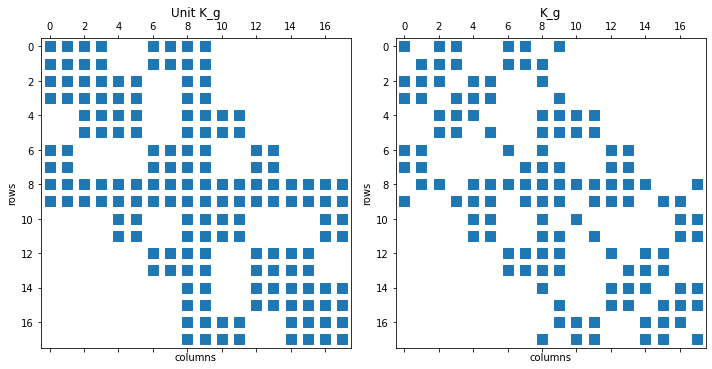

In [38]:
# Disposition K_g matrix compared to normalized K_g_unit matrix

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].spy(sp.lil_matrix(K_g_unit))

ax[0].set_title('Unit K_g')
ax[0].set_xlabel('columns')
ax[0].set_ylabel('rows')

# -----------------------------------------------

ax[1].spy(K_g)

ax[1].set_title('K_g')
ax[1].set_xlabel('columns')
ax[1].set_ylabel('rows')

# -----------------------------------------------

fig.tight_layout()

plt.savefig('K_matrix.png')

One can see that some values of K_g are cancelling. This confirm the necessity of using a normalized unit matrix to check if disposition to global coordinates occurs well or not.

Not that you can display K_g_unit to check for weight at each coordinates.

In [39]:
# Checking K55 value, numerically and analytically
print(f'Analytically : K55 = {.5*(mu*L/H + (lam+2*mu)*H/L)}')
print(f'Numerically  : K55 = {K_g[4,4]}')

Analytically : K55 = 671.1409395973149
Numerically  : K55 = 671.1409395973149


A result like this one tends to confirm the well runing of the code.

##### Boundary condition to get singular solution

In [40]:
def BC(coords, nb_BC, x_BC, cd, disp_BC):
    
    """ Function calculating indicies where BC is applied 
    and displaying this BC """
    
    # ----------------------------------------------------------

    # INDICIES
    
    # Size
    nb_nodes = len(coords)
    
    idx = np.zeros((np.size(coords, 0), nb_BC))
    
    for i in range(nb_nodes):
        for j in range(nb_BC):
            idx[i,j] = (coords[i,x_BC[j]]==cd[j])

    # ----------------------------------------------------------

    # DISPLAY indices where we apply BC - local formulation 
    
    blank    = np.zeros(1) # value to be removed afterward
    indice   = np.zeros((3, nb_BC)) # 3 as we know on a surface 3 nods share the same coordinate, either on x1 or x2

    for j in range(nb_BC):
        indice[:,j]  = np.append(blank, np.where(idx[:,j]))[1:]
        
    indice = indice.astype(int)

    print('BC on speed imposed\n')
    
    for k in range(nb_BC):
        print(f"Indices where condition on x{x_BC[k]+1}={cd[k]} : {indice[:,k]} (condition on U{disp_BC[k]+1})")
        
    return indice

##### Unit diagonal term method - rebuilding of K and F

In [41]:
# FUNCTION TO ACCOUNT FOR DIRICHLET BOUNDARY CONDITIONS

def K_F_BC(K_g, F, U_BC, indice, nb_BC, disp_BC):
    
    """ Building new force vector removing K components associated to position of BC 
    + F concerned values to U """

    # ----------------------------------------------------------

    size_K = np.size(K_g, 0)
    size_F = np.size(F, 1)

    nb_elem       = len(connect_mat)
    nb_nodes_elem = np.size(connect_mat,1)
    nb_nodes      = len(coords)
    
    # Vertical size K_g (square matrix) & number of indices where BC occurs (3) times nb_BC
    K_BC = sp.lil_matrix((size_K, nb_BC*np.size(indice, 0)))

    for i in range(size_F):
        for j in range(nb_BC):
            for k in range(np.size(indice, 0)):

                j_global = k+j*np.size(indice, 0)

                K_BC[:,j_global] = K_g[:,2*indice[:,j]+disp_BC[j]][:,k]  # ex : 2*indice[:,0]+i1 = from local(indice[:,0]) to global. One might note that i1 = 0 or 1 --> we have even/odd terms --> component along ex or ey respectively
                F[:,i] += -K_BC[:,k:k+1]*U_BC[j]

            # ---------------------------------------------------------------

            # removing necessary rows and columns in K_g + F=U

        for j in range(nb_BC):

            k_zero = 2*indice[:,j]+disp_BC[j] # indice to where we modify value of K_g (recall : index where BC imposed)

            for k in k_zero:
                K_g[:,k] = 0  # col at zero
                K_g[k,:] = 0  # row at zero

                K_g[k,k] = 1  # intersection at one

                # ---------------------------

                F[k,i] = U_BC[j]         
            
    # ---------------------------------------------------------------

    print('\n# ---------------------------------------------------------------\n')

    # Building new force vector removing K components associated to position of BC

    print('Recalculation of K_g & F through unit diagonal term method\n')
    
    print('Calculating .......\n')

    print('New K_g & F calculated\n')
            
    return (K_g, F)

### 7.1 Numerical application - Assembly - Resolution

In [42]:
# ASSEMBLY

# ----------------------------------------------------------

# DO YOU WANT TO IMPOSE BC ON SPEED ?
impose_BC = True

if impose_BC==True:

    # ----------------------------------------------------------    
    # ----------------------------------------------------------
    # ---------------------- STEP 1 - BC -----------------------
    # ----------------------------------------------------------
    # ----------------------------------------------------------

    # HOW MUCH BC ?
    
    nb_BC = 2
        
    # ----------------------------------------------------------
    
    # ON WHICH VARIABLE ?
    
    x_BC = np.zeros((nb_BC, 1)) # Vector variables on which we put BC
    
    # 0 : condition on x1 (row)
    # 1 : condition on x2 (col)
    # (terms that'll be useful to consider global coordinates)
    
    x_BC = np.array([0, 1]).reshape(-1, 1) # change here

    # ----------------------------------------------------------

    # WHAT CONDITON ?

    cd = np.zeros((nb_BC, 1))

    # ex : cd1=0 -> condition on x1 or x2=0 (row) (recall : x1 if you put 0 before while x2 if you put 1)
    #    : cd2=H -> condition on x1 or x2=H (col)
    # (terms that'll be useful to print indices in local coordinates)

    cd = np.array([0, 0]).reshape(-1, 1) # change here

    # ----------------------------------------------------------

    # ALONG WHICH AXIS ?
    
    # ex : 0 -> condition on u1 (along ex)
    #    : 1 -> condition on u2 (along ey)
    
    # to be used in STEP 2
    disp_BC = np.array([0, 1]).reshape(-1, 1) # change here
    
    # ----------------------------------------------------------
    # ----------------------------------------------------------

    # Applying boundary conditions - get associated indices

    indice = BC(coords, nb_BC, x_BC, cd, disp_BC)

    # ----------------------------------------------------------
    # ----------------------------------------------------------
    # --------------------- STEP 2 - F & K ---------------------
    # ----------------------------------------------------------
    # ----------------------------------------------------------
    
    # force vector
    F = sp.lil_matrix(F_surf+F_vol)

    # ----------------------------------------------------------

    # WHAT CONDITION ON DISPLACEMENT ?
    
    U_BC = np.zeros((nb_BC,1))

    # We impose  U
    # U_{disp_BC}(id1=cd1)=U1  # ex : U_1(x1=L)=0
    # U_{disp_BC}(id1=cd1)=U2

    U_BC = np.array([0, 0]) # change here

    # ----------------------------------------------------------
    # ----------------------------------------------------------
    
    # Building new force vector removing K components associated to position of BC
    
    (K_g, F) = K_F_BC(K_g, F, U_BC, indice, nb_BC, disp_BC)  # "reshaped" K_g & F

    # ----------------------------------------------------------
    # ----------------------------------------------------------
    # ----------------------- STEP 3 - U -----------------------
    # ----------------------------------------------------------
    # ----------------------------------------------------------
    
    from scipy.sparse.linalg import spsolve

    # ----------------------------------------------------------
    # ----------------------------------------------------------
    
    # solving problem - calcul of U

    size_K = np.size(K_g,0)
    size_F = np.size(F,1)
    
    U = sp.lil_matrix((size_K, size_F))
    
    for i in range(np.size(F,1)):
        U[:,i] = spsolve(K_g, F[:,i]).reshape(-1,1)

    print('# ----------------------------------------------------------\n')
    
    print('U solution to the problem is :\n')
    print(U)

else:
    1==0
    print('No BC on speed imposed')
    print('As this, the system might be ill-defined and brgin an infinity of solution')
    

BC on speed imposed

Indices where condition on x[1]=[0] : [6 7 8] (condition on U[1])
Indices where condition on x[2]=[0] : [2 5 8] (condition on U[2])

# ---------------------------------------------------------------

Recalculation of K_g & F through unit diagonal term method

Calculating .......

New K_g & F calculated

# ----------------------------------------------------------

U solution to the problem is :

  (0, 0)	0.1615134915143664
  (1, 0)	-0.061082838315944535
  (2, 0)	0.17358575475355076
  (3, 0)	-0.030886541086145167
  (4, 0)	0.1779740489785291
  (6, 0)	0.08159027041431426
  (7, 0)	-0.05827440905274969
  (8, 0)	0.08623260268182532
  (9, 0)	-0.03127709231375095
  (10, 0)	0.08857386121814866
  (13, 0)	-0.06059699357855504
  (15, 0)	-0.030697822540417675


C:\Users\vltn0\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


##### Deformation tensor in 2D :

In [43]:
# Use of U solution on calculation of interpretable tensor 
# such as strain and stress

# --------------------------------------------------------

# Method 1 - Gn -> E under vector form

def get_ind(i, connect_mat):
    
    i_ind  = np.empty([])

    for a in range(2):
        i_intern = np.array([2*connect_mat[i]+a])
        i_ind    = np.append(i_ind, i_intern)
    return i_ind[1:]

def E_e1(k_load, i, connect_mat, U):
    
    (Ji, detJ) = J(i, coords, connect_mat)
    G_N = Gn(D_N, Ji)

    ind = get_ind(i, connect_mat)
    
    u   = U[ind,k_load].reshape(-1,2) # to fit Gn size
    return sp.lil_matrix(G_N).T * u

# --------------------------------------------------------

# Method 2 - Be -> E under matrix form

def E_e2(k_load, i, connect_mat, U):
    
    Be  = Be_a(i, coords, connect_mat)
    
    ind = get_ind(i, connect_mat)
     
    u   = U[ind, k_load]
    return sp.lil_matrix(Be) * u

##### E - Method 1

In [44]:
# Choose element
elem = 1
elem -= 1

# Choose loading
load = 1
load -= 1

E_1 = .5*(E_e1(load, elem, connect_mat, U) + E_e1(load, elem, connect_mat, U).T)

print(f"Tenseur de deformation de l'élément {elem+1} and loading {load+1} :")
print(f'\n\u03B5 =')
print(E_1)

Tenseur de deformation de l'élément 1 and loading 1 :

ε =
  (0, 0)	0.05018725922169405
  (0, 1)	-0.2606876482896121
  (1, 0)	-0.2606876482896121
  (1, 1)	-0.05961149200438717


##### E - Method 2

In [45]:
E2 = sp.lil_matrix((3, np.size(connect_mat, 0)*np.size(F, 1)))

# Deformation tensor under vectorized notation

for e in range(np.size(connect_mat, 0)):
    for f in range(np.size(F, 1)):
        E2[:,np.size(F,1)*e+f] = E_e2(f, e, connect_mat, U)

# ----------------------------------------------

# Choose element to print

elem = 1
elem -= 1

# Choose considered loading

load = 1
load -= 1

# ----------------------------------------------

print(f"Vecteur de deformation de l'élément {k} :")
print(f'\n\u03B5 =')
print(E2[:,np.size(F,1)*elem+load])
print('\nWe recall that \u03B5[3]=2*\u03B512=2*\u03B521, hence the factor 2 contrary to method 1')

Vecteur de deformation de l'élément 2 :

ε =
  (0, 0)	0.05018725922169405
  (1, 0)	-0.05961149200438717
  (2, 0)	-0.5213752965792243

We recall that ε[3]=2*ε12=2*ε21, hence the factor 2 contrary to method 1


#### Stress tensor

In [46]:
# Use of vectorized method only (method 2)

E = E2.copy()

# ----------------------------------------------

sigma = sp.lil_matrix((3, np.size(connect_mat, 0)*np.size(F, 1)))

for f in range(np.size(F, 1)):
    for e in range(np.size(connect_mat, 0)):
        sigma[:,np.size(F,1)*e+f] = np.dot(sp.lil_matrix(A), E[:,np.size(F,1)*e+f])

# ----------------------------------------------

# Choose element to print

elem = 1
elem -= 1

# Choose considered loading

load = 1
load -= 1

# ----------------------------------------------

print(f"Stress vector of element {elem+1} for loading {load+1} :")
print(f'\n\u03C3 =')
print(sigma[:,np.size(F,1)*elem+load])

# Use Epsilon from method 1 to calculate trace Epsilon

print(f'\n\u03C333 =\n{lam*np.trace(sp.csr_matrix.toarray(E_1))}') # from sparse to dense matrix to get trace
print('\nWe recall that \u03C3[3]=2*\u03C312=2*\u03C321, hence the factor 2 contrary to method 1')

Stress vector of element 1 for loading 1 :

σ =
  (0, 0)	-24.255898517353984
  (1, 0)	-38.9939859302508
  (2, 0)	-34.991630642900965

σ33 =
-30.992443379326346

We recall that σ[3]=2*σ12=2*σ21, hence the factor 2 contrary to method 1


#### Energy from deformation

In [47]:
# Energy of deformation

Energy = .5*np.dot(np.dot(U.T, K_g), U) - np.dot(np.dot(K_g, U).T, U)
print('Energy of deformation :')
print(f'{Energy[0,0]:.2f} J')

Energy of deformation :
-1.42 J


#### Work from force vector

In [48]:
Work = np.dot(U.T, F)

print('Work of external forces :')
print(f'{Work[0,0]:.2f} J')

Work of external forces :
2.85 J


These low values were expected considering the ductile material we're using as well as the forces we apply to it.

However, these results are useful to determine the well-doing of the code and to confirm if we are physically reliable when doing these calculations.

### Showing displacement

In [49]:
# Data
L = 3. #Length
H = 1. #Height

coords = np.array([
                  [L,     H], 
                  [L,   H/2],
                  [L,     0],
                  [L/2,   H],
                  [L/2, H/2],
                  [L/2,   0],
                  [0,     H],
                  [0,   H/2],
                  [0,     0]
                           ])

In [50]:
# RECALL SIZES & DATA

# Sizes
size_F        = np.size(coords,0)*np.size(coords,1)

nb_elem       = len(connect_mat)
nb_nodes_elem = np.size(connect_mat,1)
nb_nodes      = len(coords)
    
dim           = 2

# Data
g             = 9.81 # [m.s^-2]

#### You may change the number of forces in nb_Force to display as much force as you want. 
Please refer to associated part to know the magnitude of these froces.

In [58]:
# Display displacement

nb_Force = 2
size_F   = np.size(coords,0)*np.size(coords,1)

# Initialisation
F_vol  = sp.lil_matrix((size_F, nb_Force))
F_surf = sp.lil_matrix((size_F, nb_Force))

# Building force vector
(F_vol, F_surf) = Force(nb_Force, g, H, L, coords, connect_mat, size_F, nb_elem, nb_nodes_elem, dim)

F = sp.lil_matrix(F_surf + F_vol)

# ----------------------------------------------------

# Applying BC to stiffness matrix & force vector
(K_g, F) = K_F_BC(K_g, F, U_BC, indice, nb_BC, disp_BC)

# ----------------------------------------------------

# Sizes
size_K = np.size(K_g, 0)

# Solving system - displacement vector
U = sp.lil_matrix((size_K, nb_Force))
    
for i in range(np.size(F,1)):
    U[:,i] = spsolve(K_g, F[:,i]).reshape(-1,1)
    
print('# ----------------------------------------------------------\n')

print('U solution to the problem is :\n')
print(U)


# ---------------------------------------------------------------

Recalculation of K_g & F through unit diagonal term method

Calculating .......

New K_g & F calculated

# ----------------------------------------------------------

U solution to the problem is :

  (0, 0)	0.1615134915143664
  (0, 1)	0.48454047454309873
  (1, 0)	-0.061082838315944535
  (1, 1)	-0.18324851494783354
  (2, 0)	0.17358575475355076
  (2, 1)	0.5207572642606522
  (3, 0)	-0.030886541086145167
  (3, 1)	-0.09265962325843548
  (4, 0)	0.1779740489785291
  (4, 1)	0.5339221469355871
  (6, 0)	0.08159027041431426
  (6, 1)	0.24477081124294256
  (7, 0)	-0.05827440905274969
  (7, 1)	-0.17482322715824897
  (8, 0)	0.08623260268182532
  (8, 1)	0.25869780804547593
  (9, 0)	-0.03127709231375095
  (9, 1)	-0.09383127694125282
  (10, 0)	0.08857386121814866
  (10, 1)	0.2657215836544459
  (13, 0)	-0.06059699357855504
  (13, 1)	-0.18179098073566508
  (15, 0)	-0.030697822540417675
  (15, 1)	-0.09209346762125302


C:\Users\vltn0\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


#### Re-building of initial structure - symmetry

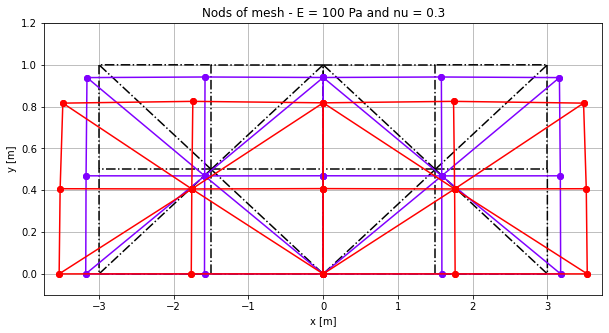

In [59]:
# coords as a function of F

size_F = np.size(F,1)

fig, ax = plt.subplots(figsize=(10,5))

for cell in connect_mat:
    ax.plot(coords[cell][:,0], coords[cell][:,1], "k-.", linewidth=1.5)
    ax.plot(-coords[cell][:,0], coords[cell][:,1], "k-.", linewidth=1.5)

for i in range(size_F):

    # Apply displacement
    
    # reshape coords to fit U shape & apply displacement
    coords_U = coords.reshape(-1,1).copy()
    coords_U += U[:,i]

    # reshape coords back
    coords_U = coords_U.reshape(-1, 2)
    
    # -------------------------------------------------

    # Display Displacement
        
    # Coordinates nods
    n = nb_Force
    c = cm.rainbow(np.linspace(0, 1, n))[i]
    for cell in connect_mat:
        ax.plot(coords_U[cell][:,0], coords_U[cell][:,1], "o-", c=c)
        ax.plot(-coords_U[cell][:,0], coords_U[cell][:,1], "o-", c=c)

    ax.set_title(f'Nods of mesh - E = {100} Pa and nu = {0.30}')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')

    ax.set_xlim(-.2 - max(coords_U[:,0]), max(coords_U[:,0]) +.2)
    ax.set_ylim(-0.1, H + .2) 

plt.grid('True')

plt.savefig('displacement_nu_03.png')

This figure has for only purpose to show the displacements and effect of the considered forces.

If you want to look at a more physically reliable result, you may change young modulus from $E=10^2$ Pa to $E=10^9$ Pa.

$\Rightarrow$ Doing so, you will have practically no deformation : of magnitude $10^{-6}$ m for rubber ($\nu \approx 0.49$) while $10^{-20}$ m for steel ($\nu \approx 0.30$).

You may as well change the number of forces to fit your convenience. 

$\underline{Conclusion}$

As a conclusion, we have been building during this course a set of competences used here in the case of a rectangular 2D mesh. You may note that the obtained result is to be duplicated as, as we recall it, we have a symmetry in $x=0$. 

We have been building the most consistent code possible to enable for consideration of any BC as well as own defined forces. The graph displayed here in the end has been a way for us to see how behaves the structure given the forces we apply to it. Doing a general code as we have has the purpose to facilitate future modifications. Therefore, one can add both areal and volumic forces to his convenience. We could similarly considering a restoring force to the bottom instead of an embedded connection.

In the end, the obtained displacements are in agreement with the direction and intensity one could expect given the material's caracteristics.